In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df_1000_posix = pd.read_csv('./results_1000_posix.csv')
df_1000_open_mp_static = pd.read_csv('./results_1000_openmp_static.csv')
df_1000_posix.head()

,num_threads,run,real_time
0,1,1,6.45
1,1,2,6.52
2,1,3,6.72
3,1,4,6.67
4,1,5,6.41


In [2]:
df_1000_open_mp_static.head()



,num_threads,run,real_time
0,1,1,5.39
1,1,2,6.32
2,1,3,5.27
3,1,4,5.14
4,1,5,5.24


In [3]:
# Compute grouped statistics
grouped_1000_posix = df_1000_posix.groupby('num_threads')['real_time'].agg(['mean', 'std']).reset_index()
grouped_1000_posix

,num_threads,mean,std
0,1,6.507,0.114703
1,2,4.646,0.094304
2,3,4.013,0.069450
3,4,3.767,0.094405
4,5,4.005,0.170180
5,6,4.209,0.484297
6,7,4.739,1.117919
7,8,4.564,0.727052
8,9,4.152,0.211912
9,10,3.988,0.267033


In [4]:

grouped_1000_open_mp = df_1000_open_mp_static.groupby('num_threads')['real_time'].agg(['mean', 'std']).reset_index()
grouped_1000_open_mp

,num_threads,mean,std
0,1,5.402,0.348960
1,2,3.926,0.089716
2,3,3.595,0.162771
3,4,3.364,0.229647
4,5,3.287,0.082738
5,6,3.200,0.086667
6,7,3.142,0.127436
7,8,3.111,0.069033
8,9,3.140,0.100995
9,10,3.128,0.065115


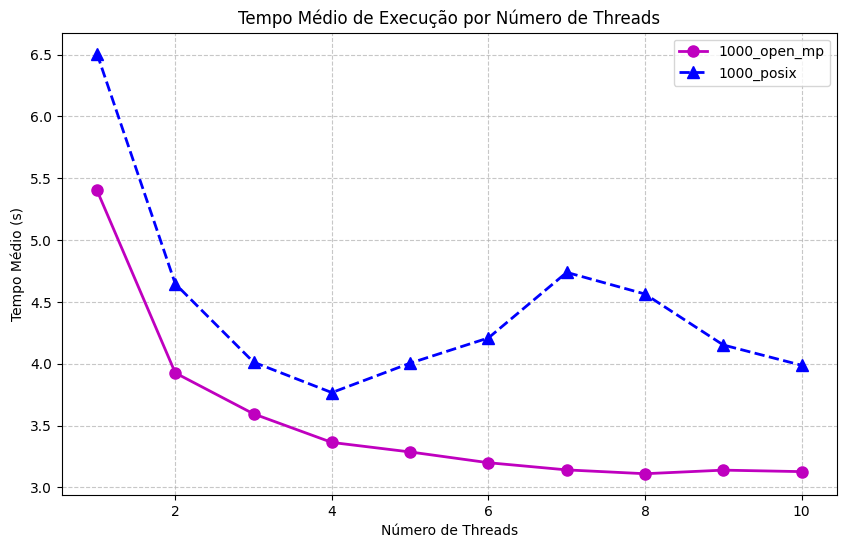

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_1000_open_mp['num_threads'], grouped_1000_open_mp['mean'],
         'mo-', linewidth=2, markersize=8, label='1000_open_mp')
plt.plot(grouped_1000_posix['num_threads'], grouped_1000_posix['mean'],
         'b--', marker='^', linewidth=2, markersize=8, label='1000_posix')
plt.legend()
plt.xlabel('Número de Threads')
plt.ylabel('Tempo Médio (s)')
plt.title('Tempo Médio de Execução por Número de Threads')
plt.grid(True, linestyle='--', alpha=0.7)


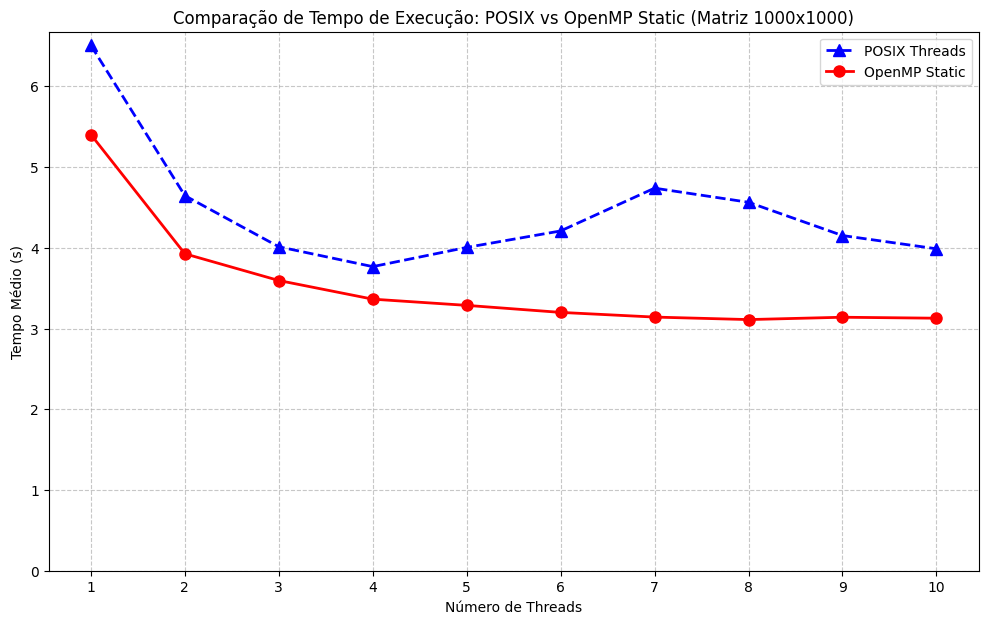

In [6]:
# Comparison graph between POSIX and OpenMP Static implementations for 1000x1000 matrices
# Compute grouped statistics for both implementations
grouped_posix = df_1000_posix.groupby('num_threads')['real_time'].agg(['mean', 'std']).reset_index()
grouped_openmp = df_1000_open_mp_static.groupby('num_threads')['real_time'].agg(['mean', 'std']).reset_index()

# Create the comparison plot
plt.figure(figsize=(12, 7))
plt.plot(grouped_posix['num_threads'], grouped_posix['mean'], 'b--', marker='^', linewidth=2, markersize=8, label='POSIX Threads')
plt.plot(grouped_openmp['num_threads'], grouped_openmp['mean'], 'r-', marker='o', linewidth=2, markersize=8, label='OpenMP Static')
plt.legend()
plt.xlabel('Número de Threads')
plt.ylabel('Tempo Médio (s)')
plt.title('Comparação de Tempo de Execução: POSIX vs OpenMP Static (Matriz 1000x1000)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(grouped_posix['num_threads'])
plt.ylim(bottom=0)  # Start y-axis at zero
plt.show()


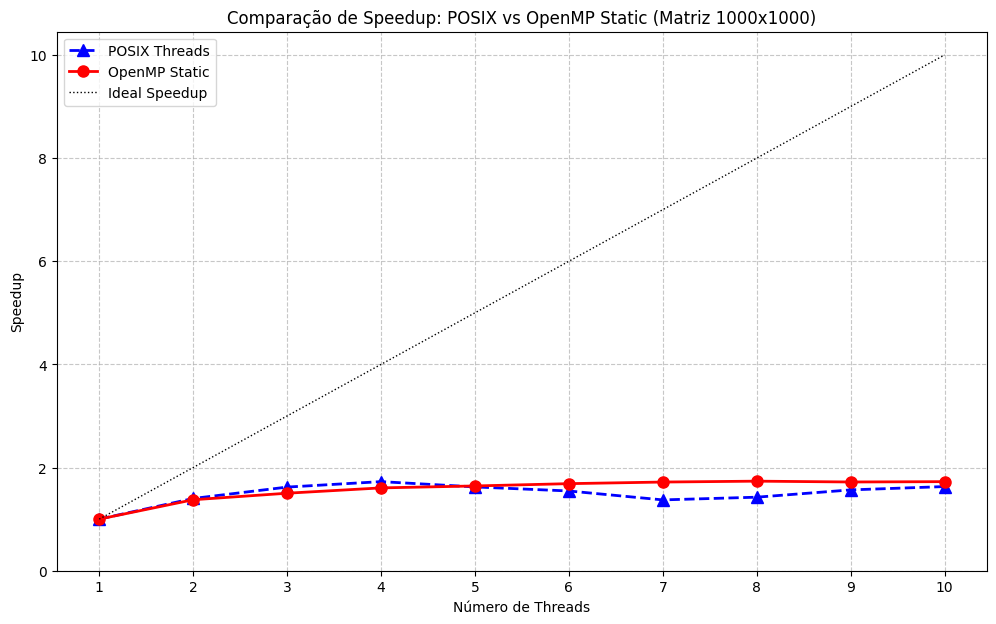

In [7]:
# Speedup comparison graph between POSIX and OpenMP Static implementations
# Calculate speedup for each implementation
speedup_posix = grouped_posix['mean'].iloc[0] / grouped_posix['mean']
speedup_openmp = grouped_openmp['mean'].iloc[0] / grouped_openmp['mean']

# Create the speedup comparison plot
plt.figure(figsize=(12, 7))
plt.plot(grouped_posix['num_threads'], speedup_posix, 'b--', marker='^', linewidth=2, markersize=8, label='POSIX Threads')
plt.plot(grouped_openmp['num_threads'], speedup_openmp, 'r-', marker='o', linewidth=2, markersize=8, label='OpenMP Static')
plt.plot(grouped_posix['num_threads'], grouped_posix['num_threads'], 'k:', linewidth=1, label='Ideal Speedup')
plt.legend()
plt.xlabel('Número de Threads')
plt.ylabel('Speedup')
plt.title('Comparação de Speedup: POSIX vs OpenMP Static (Matriz 1000x1000)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(grouped_posix['num_threads'])
plt.ylim(bottom=0)  # Start y-axis at zero
plt.show()


In [8]:
# Summary of comparison between POSIX and OpenMP Static implementations
# Calculate efficiency (speedup / number of threads) for each implementation
efficiency_posix = speedup_posix / grouped_posix['num_threads']
efficiency_openmp = speedup_openmp / grouped_openmp['num_threads']

# Create a summary dataframe
comparison_summary = pd.DataFrame({
    'num_threads': grouped_posix['num_threads'],
    'posix_time': grouped_posix['mean'],
    'openmp_time': grouped_openmp['mean'],
    'posix_speedup': speedup_posix,
    'openmp_speedup': speedup_openmp,
    'posix_efficiency': efficiency_posix,
    'openmp_efficiency': efficiency_openmp,
    'time_ratio': grouped_posix['mean'] / grouped_openmp['mean']
})

# Display the summary
print("Comparação entre implementações POSIX e OpenMP Static para matriz 1000x1000:")
print(comparison_summary)

# Calculate and display average metrics
print("\nMétricas médias (excluindo execução com 1 thread):")
avg_metrics = comparison_summary[comparison_summary['num_threads'] > 1].mean()
print(f"Tempo médio POSIX: {avg_metrics['posix_time']:.2f} segundos")
print(f"Tempo médio OpenMP: {avg_metrics['openmp_time']:.2f} segundos")
print(f"Speedup médio POSIX: {avg_metrics['posix_speedup']:.2f}x")
print(f"Speedup médio OpenMP: {avg_metrics['openmp_speedup']:.2f}x")
print(f"Eficiência média POSIX: {avg_metrics['posix_efficiency']:.2f} (ideal = 1.0)")
print(f"Eficiência média OpenMP: {avg_metrics['openmp_efficiency']:.2f} (ideal = 1.0)")
print(f"Razão média de tempo (POSIX/OpenMP): {avg_metrics['time_ratio']:.2f}x")


Comparação entre implementações POSIX e OpenMP Static para matriz 1000x1000:
   num_threads  posix_time  openmp_time  posix_speedup  openmp_speedup  \
0            1       6.507        5.402       1.000000        1.000000   
1            2       4.646        3.926       1.400560        1.375955   
2            3       4.013        3.595       1.621480        1.502643   
3            4       3.767        3.364       1.727369        1.605826   
4            5       4.005        3.287       1.624719        1.643444   
5            6       4.209        3.200       1.545973        1.688125   
6            7       4.739        3.142       1.373074        1.719287   
7            8       4.564        3.111       1.425723        1.736419   
8            9       4.152        3.140       1.567197        1.720382   
9           10       3.988        3.128       1.631645        1.726982   

   posix_efficiency  openmp_efficiency  time_ratio  
0          1.000000           1.000000    1.204554  
1 